In [1]:
import tensorflow as tf
import keras
from keras import Sequential, Input, layers, losses, optimizers

import matplotlib
from matplotlib import pyplot as plt

2025-03-20 12:53:17.996402: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-20 12:53:18.003120: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742489598.011876   18019 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742489598.014312   18019 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742489598.020275   18019 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# Tensorflow

## Overview

In [2]:
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x, x.shape, x.dtype, sep='\n')

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


I0000 00:00:1742489599.248799   18019 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9712 MB memory:  -> device: 0, name: NVIDIA RTX A2000 12GB, pci bus id: 0000:01:00.0, compute capability: 8.6


### Standard Mathematical Operations on Tensors and Operations Specialized for Machine Learning

#### Tensor Addition

In [3]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

#### Scalar Multiplication

In [4]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

#### Tensor Multiplication

In [5]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

#### Tensor Concatenation

In [6]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

#### Softmax

In [7]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

#### Sum

In [8]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

### Checking if GPU is being used

In [9]:
if tf.config.list_physical_devices('GPU'):
    print("Tensorflow IS using the GPU")
else:
    print("Tensorflow IS NOT using the GPU")

Tensorflow IS using the GPU


### Training Loop

#### Steps to create a basic model and train it from scratch

##### First, create some example data

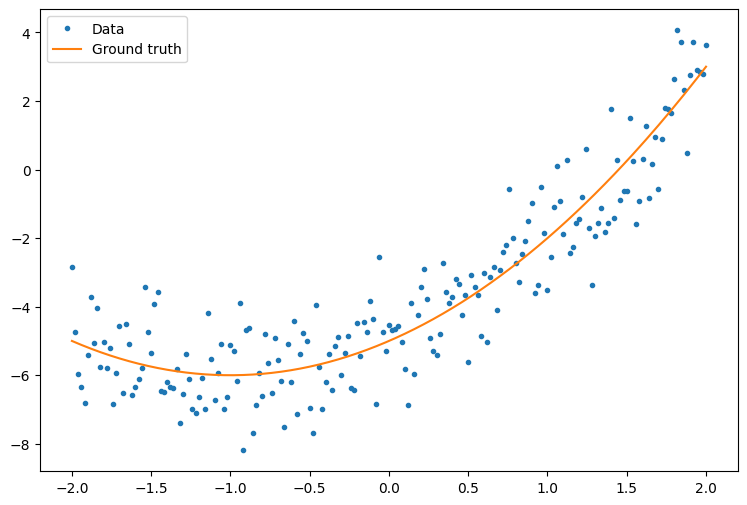

In [10]:
matplotlib.rcParams['figure.figsize'] = [9,6]

x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend()

##### 2. Create a quadratic model

In [11]:
class Model(tf.Module):

    def __init__(self):
        rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)

        self.w_q = tf.Variable(rand_init[0])
        self.w_l = tf.Variable(rand_init[1])
        self.b   = tf.Variable(rand_init[2])

    @tf.function
    def __call__(self, x):
        return self.w_q * (x**2) + self.w_l * x + self.b

##### 3. Observe model performance before training

In [12]:
def plot_preds(x, y, f, model, title):
    plt.figure()
    plt.plot(x, y, '.', label='Data')
    plt.plot(x, f(x), label='Ground Truth')
    plt.plot(x, model(x), label='Predictions')
    plt.title(title)
    plt.legend()

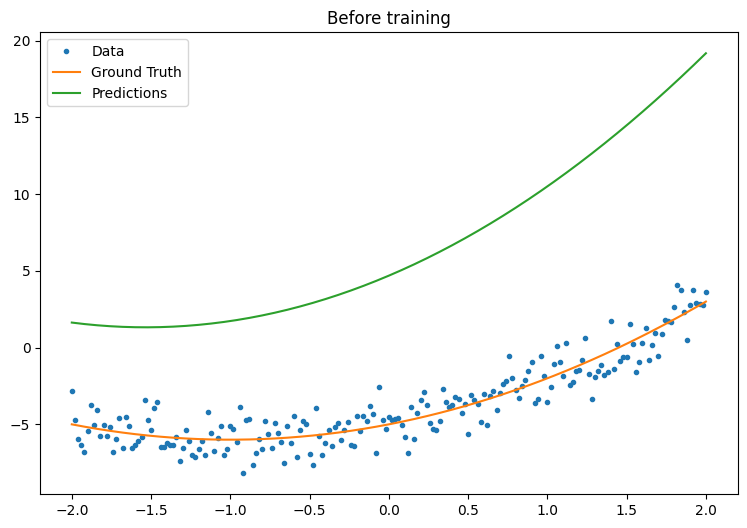

In [13]:
quad_model = Model()
plot_preds(x, y, f, quad_model, 'Before training')

##### 4. Define a loss for your model

In [14]:
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

In [15]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

2025-03-20 12:53:20.549938: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-03-20 12:53:20.570387: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-03-20 12:53:20.608670: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-03-20 12:53:20.687464: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Mean squared error for step 0:  56.474
Mean squared error for step 10:  9.966


2025-03-20 12:53:20.844328: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Mean squared error for step 20:  4.140
Mean squared error for step 30:  2.162


2025-03-20 12:53:21.157826: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Mean squared error for step 40:  1.473
Mean squared error for step 50:  1.226
Mean squared error for step 60:  1.136
Mean squared error for step 70:  1.108


2025-03-20 12:53:21.779494: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Mean squared error for step 80:  1.099
Mean squared error for step 90:  1.095



Text(0.5, 1.0, 'MSE loss vs training iterations')

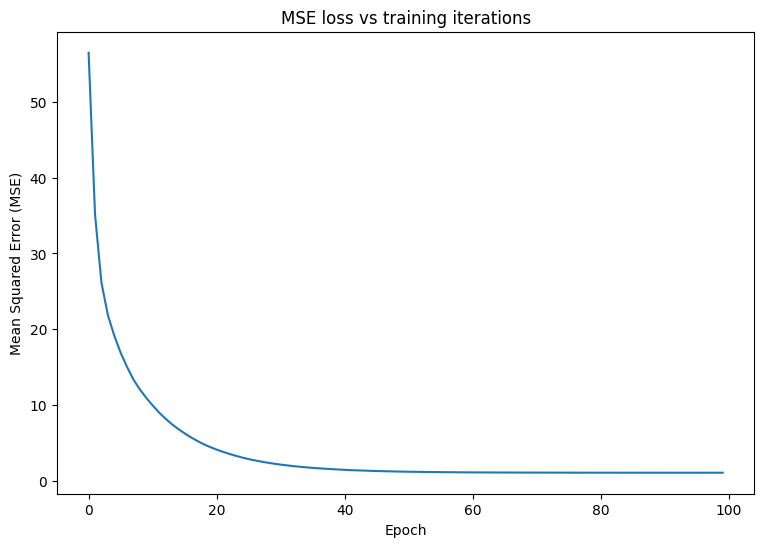

In [16]:
epochs = 100
learning_rate = 0.01
my_losses = []

for epoch in range(epochs):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            batch_loss = mse_loss(quad_model(x_batch), y_batch)
        
        grads = tape.gradient(batch_loss, quad_model.variables)
        for g, v in zip(grads, quad_model.variables):
            v.assign_sub(learning_rate * g)
    
    loss = mse_loss(quad_model(x), y)
    my_losses.append(loss)
    if epoch % 10 == 0:
        print(f'Mean squared error for step {epoch}: {loss.numpy(): 0.3f}')

print()
plt.plot(range(epochs), my_losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE loss vs training iterations")



##### 6. Observe performance after training

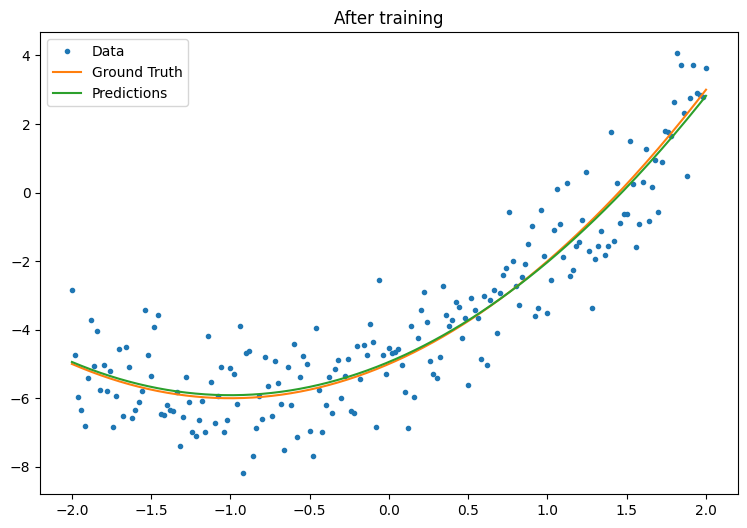

In [17]:
plot_preds(x, y, f, quad_model, 'After training')

#### Training Loop with keras utilities

In [18]:
new_model = Sequential([
    layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    layers.Dense(units=1, kernel_initializer=tf.random.normal)
])

In [19]:
new_model.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.SGD(learning_rate=0.01)
)

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('./my_new_model.keras')

I0000 00:00:1742489602.742820   18155 service.cc:152] XLA service 0x7f66a0007e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742489602.742839   18155 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A2000 12GB, Compute Capability 8.6
I0000 00:00:1742489602.751711   18155 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1742489602.835824   18155 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Text(0.5, 1.0, 'Keras training progress')

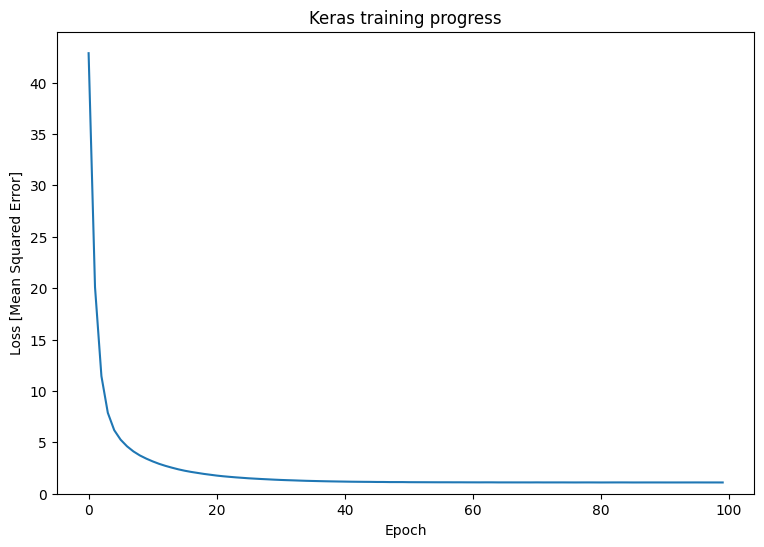

In [20]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim(0, max(plt.ylim()))
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress')


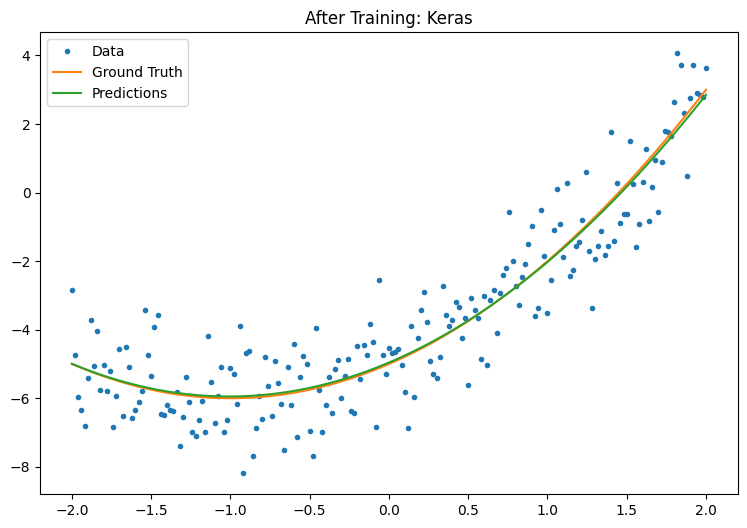

In [21]:
plot_preds(x, y, f, new_model, 'After Training: Keras')

## Tensors

Often axes are ordered from global to local: the batch axis first, followed by spatial dimensions, and features for each location last. This way feature vectors are contiguous regions of memory.




## TensorFlow Modules

In Tensorflow, most high-level implementations of layers and modules are built on the same foundational class: tf.Module

In [22]:
class SimpleModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.a_variable = tf.Variable(5.0, name="train_me")
        self.non_trainable_variable = tf.Variable(5.0, trainable=False, name="do_not_train_me")
    def __call__(self, x):
        return self.a_variable * x + self.non_trainable_variable


In [23]:
simple_module = SimpleModule(name="simple")
simple_module(tf.constant(5.0))

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

By subclassing tf.Module, any tf.Variable or tf.Module instances assigned to this object's properties are automatically collected. This allows you to save and load variables, and also creates collections of tf.Module objects

In [24]:
print("trainable variables:", simple_module.trainable_variables)
print("all variables:", simple_module.variables)

trainable variables: (<tf.Variable 'train_me:0' shape=() dtype=float32, numpy=5.0>,)
all variables: (<tf.Variable 'train_me:0' shape=() dtype=float32, numpy=5.0>, <tf.Variable 'do_not_train_me:0' shape=() dtype=float32, numpy=5.0>)


Below is an example of a two-layer linear layer model made out of modules

In [25]:
class Dense(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(
            tf.random.normal(shape=(in_features, out_features)),
            name="w"
        )
        self.b = tf.Variable(
            tf.zeros(shape=(out_features)),
            name="b"
        )
    
    def __call__(self, x):
        y = tf.matmul(x, self.w) + self.b
        return tf.nn.relu(y)


In [26]:
class SequentialModule(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)

        self.dense1 = Dense(in_features=3, out_features=3)
        self.dense2 = Dense(in_features=3, out_features=2)

    def __call__(self, x):
        x = self.dense1(x)
        return self.dense2(x)

In [27]:
my_model = SequentialModule(name="the_model")
print("Model results", my_model(tf.constant([[2., 2., 2.]])))

Model results tf.Tensor([[0. 0.]], shape=(1, 2), dtype=float32)


tf.Module instances will automatically collect, recursively, any tf.Variable or tf.Module instances assigned to it. This allows you to manage collections of tf.Module objects with a single model instance, and save and load whole models.

In [28]:
print("Submodules:", my_model.submodules)

Submodules: (<__main__.Dense object at 0x7f67c6f34880>, <__main__.Dense object at 0x7f67c6f36fe0>)


In [29]:
for var in my_model.variables:
    print(var, "\n")

<tf.Variable 'b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)> 

<tf.Variable 'w:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.4205725 , -0.26398706,  0.6415229 ],
       [ 0.7666823 ,  0.46364215, -0.6416984 ],
       [-0.44821292,  0.32414132, -1.2064507 ]], dtype=float32)> 

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)> 

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.9112619 , -1.1396598 ],
       [-1.4547596 , -0.57506096],
       [-1.5809414 , -0.14581653]], dtype=float32)> 



### Saving weights

You can save a tf.Module as both a checkpoint and a SavedModel. Checkpoints are just the weights.

In [30]:
chkp_path = "./my_checkpoint"
checkpoint = tf.train.Checkpoint(model=my_model)
checkpoint.write(chkp_path)

'./my_checkpoint'

When you load models back in, you overwrite the values in your Python object.

In [31]:
new_model = SequentialModule()
new_checkpoint = tf.train.Checkpoint(model=new_model)

print(new_model(tf.constant([[2., 2., 2.]])))
new_checkpoint.restore("my_checkpoint")
print(new_model(tf.constant([[2., 2., 2.]])))

tf.Tensor([[0.18831463 0.        ]], shape=(1, 2), dtype=float32)
tf.Tensor([[0. 0.]], shape=(1, 2), dtype=float32)


## Training Loops

In [32]:
# setup
colors = plt.rcParams["axes.prop_cycle"].by_key()['color']

#### Solving machine learning problems

Solving a machine learning problem usually consists of the following steps:

* Obtain training data.
* Define the model.
* Define a loss function.
* Run through the training data, calculating loss from the ideal value.
* Calculate gradients for that loss and use an optimizer to adjust the variables to fit the data.
* Evaluate your results.

#### Solving a basic ML problem: simple linear regression

This is the most basic of machine learning problems: Given x and y try to find the slope and offset of a line

##### Data

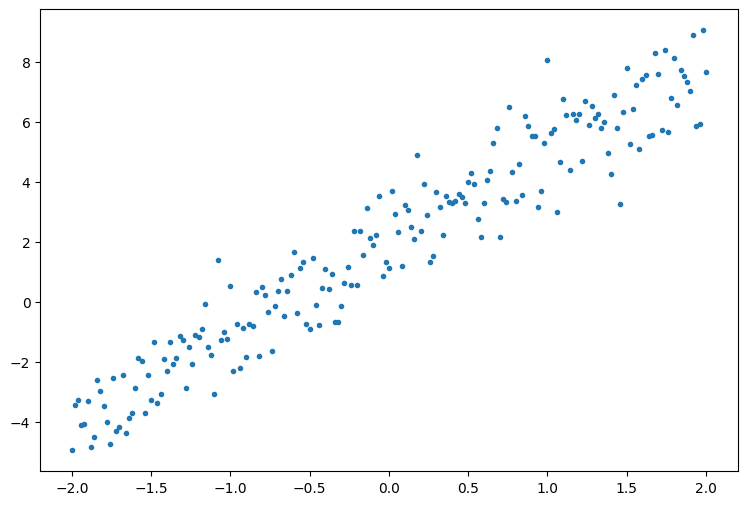

In [33]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

x = tf.linspace(-2, 2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

plt.plot(x, y, '.')
plt.show()

##### Define the model

Use tf.Variable to represent all weights in a model. Use tf.Module to enxapsulate the variables and the computation.

In [34]:
class MyModel(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b

model = MyModel()

print("Variables:", model.variables)
assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


##### Define a loss function

A loss function measures how well the output of a model for a given input matches the target output. The goal is to minimize this difference during training. Here we define the standard L@ loss, also known as the "mean squared" error.

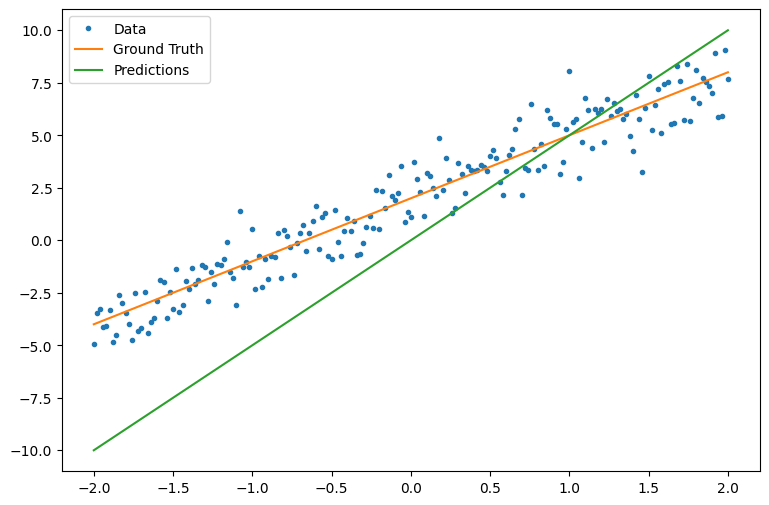

Current loss: 10.200772


In [35]:
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground Truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % loss(y, model(x)).numpy())

##### Define a training loop
The training loop consists of repeatedly doing three taskas in order:

* Sending a batch of inputs through the model to generate outputs
* Calculating the loss by comparing the outputs to the label
* Using gradient tape to find the gradients
* Optimizing the variables with those gradients

In [36]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(x))

    dw, db = t.gradient(current_loss, [model.w, model.b])

    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)


In [37]:
model = MyModel()

weights = []
biases = []
epochs = range(10)

def report(model, loss):
    return f"W = {model.w.numpy():1.2f}, b {model.b.numpy():1.2f}, loss={loss:2.5f}"

def training_loop(model, x, y):
    for epoch in epochs:
        train(model, x, y, learning_rate=0.1)

        weights.append(model.w.numpy())
        biases.append(model.b.numpy())
        current_loss = loss(y, model(x))

        print(f"Epoch {epoch:2d}:")
        print("   ", report(model, current_loss))

In [38]:
current_loss = loss(y, model(x))
print("Starting:")
print("   ", report(model, current_loss))

training_loop(model, x, y)

Starting:
    W = 5.00, b 0.00, loss=10.20077
Epoch  0:
    W = 4.46, b 0.39, loss=6.31464
Epoch  1:
    W = 4.07, b 0.70, loss=4.09519
Epoch  2:
    W = 3.78, b 0.95, loss=2.81763
Epoch  3:
    W = 3.57, b 1.15, loss=2.07629
Epoch  4:
    W = 3.41, b 1.31, loss=1.64256
Epoch  5:
    W = 3.30, b 1.44, loss=1.38671
Epoch  6:
    W = 3.22, b 1.54, loss=1.23458
Epoch  7:
    W = 3.16, b 1.62, loss=1.14342
Epoch  8:
    W = 3.11, b 1.69, loss=1.08838
Epoch  9:
    W = 3.08, b 1.74, loss=1.05492


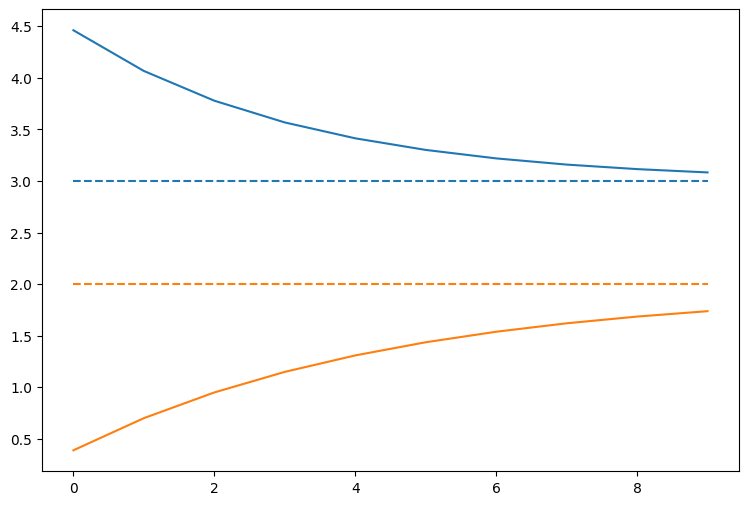

In [39]:
plt.plot(epochs, weights, label="Weights", color=colors[0])
plt.plot(epochs, [TRUE_W] * len(epochs), '--',
         label="True Weight",
         color=colors[0])

plt.plot(epochs, biases, label='bias', color=colors[1])
plt.plot(epochs, [TRUE_B] * len(epochs), "--",
         label="True bias",
         color=colors[1])

plt.legend
plt.show()

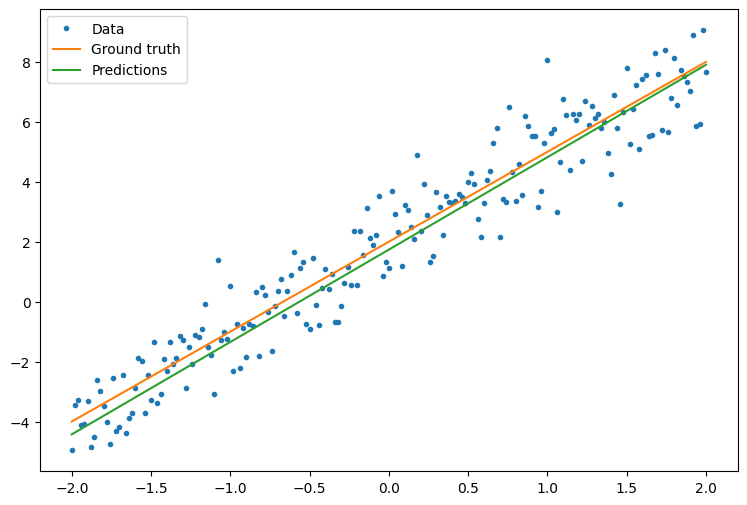

Current loss: 1.054921


In [40]:
plt.plot(x, y, '.', label='Data')
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print(f"Current loss: {loss(model(x), y).numpy():1.6f}")

#### Same Solution with Keras

It's useful to contrast the code above with the equivalent in Keras.

subclass the tf.keras.Model instead of tf.Module

In [41]:
x

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
       -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
       -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
       -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
       -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
       -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
       -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
       -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42, 

In [42]:
class MyModelKeras(keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    
    def call(self, x):
        return self.w * x + self.b

keras_model = MyModelKeras()
    

In [43]:
keras_model.built

False

In [44]:
keras_model(x)

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([-10.        ,  -9.9       ,  -9.8       ,  -9.700001  ,
        -9.599999  ,  -9.5       ,  -9.4       ,  -9.3       ,
        -9.2       ,  -9.1       ,  -9.        ,  -8.9       ,
        -8.8       ,  -8.7       ,  -8.6       ,  -8.5       ,
        -8.4       ,  -8.3       ,  -8.2       ,  -8.1       ,
        -8.        ,  -7.9       ,  -7.7999997 ,  -7.7       ,
        -7.6       ,  -7.5       ,  -7.4       ,  -7.3       ,
        -7.2000003 ,  -7.1       ,  -7.        ,  -6.9       ,
        -6.8       ,  -6.7000003 ,  -6.6000004 ,  -6.5       ,
        -6.3999996 ,  -6.3       ,  -6.2       ,  -6.1000004 ,
        -6.        ,  -5.8999996 ,  -5.7999997 ,  -5.7       ,
        -5.6       ,  -5.5       ,  -5.4       ,  -5.2999997 ,
        -5.2       ,  -5.1       ,  -5.        ,  -4.9       ,
        -4.7999997 ,  -4.7       ,  -4.6       ,  -4.5       ,
        -4.4       ,  -4.3       ,  -4.2       ,  -4.1       ,
       

In [45]:
keras_model.variables

[]

In [46]:
keras_model = MyModelKeras()

keras_model.compile(
    run_eagerly=False,
    optimizer=optimizers.SGD(learning_rate=0.1),
    loss=losses.mean_squared_error,
)


In [47]:
my_new_keras_model = MyModelKeras()
print(my_new_keras_model.variables)

my_new_model = MyModel()
print(my_model.variables)

[]
(<tf.Variable 'b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>, <tf.Variable 'w:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.4205725 , -0.26398706,  0.6415229 ],
       [ 0.7666823 ,  0.46364215, -0.6416984 ],
       [-0.44821292,  0.32414132, -1.2064507 ]], dtype=float32)>, <tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>, <tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.9112619 , -1.1396598 ],
       [-1.4547596 , -0.57506096],
       [-1.5809414 , -0.14581653]], dtype=float32)>)


In [48]:
print(x.shape[0])
keras_model.fit(x, y, epochs=10, batch_size=1000)

201
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 10.2008
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.2008
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.2008
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.2008
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.2008
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.2008

/home/jquinteros/tfcode/tfenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.2008
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.2008
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.2008
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.2008
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.2008


# Keras

## Overview

In [49]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/home/jquinteros/tfcode/tfenv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.778453  ,  0.41591722,  0.08155027,  0.79104   ,  0.39576823,
        -0.33983123,  0.19511497, -0.13351405, -0.97698045, -0.6043402 ]],
      dtype=float32)

In [52]:
tf.nn.softmax(predictions).numpy()

array([[0.04382424, 0.14468476, 0.10356407, 0.21054094, 0.14179869,
        0.06795249, 0.11601913, 0.08352334, 0.03593313, 0.05215916]],
      dtype=float32)

In [53]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [54]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.6889465)

In [55]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [56]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


2025-03-20 12:53:27.862662: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8586 - loss: 0.4748
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9544 - loss: 0.1505
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9676 - loss: 0.1071
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9726 - loss: 0.0876
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0761


In [57]:
model.evaluate(x_test, y_test, verbose=2)

2025-03-20 12:53:42.769119: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 4 bytes spill stores, 4 bytes spill loads



313/313 - 2s - 5ms/step - accuracy: 0.9764 - loss: 0.0803


[0.08030915260314941, 0.9764000177383423]

In [58]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [59]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.3262265e-08, 7.3924447e-08, 9.9860126e-06, 8.0198064e-05,
        7.2283772e-12, 7.5687041e-08, 7.0025562e-14, 9.9990940e-01,
        3.7303796e-08, 1.2780650e-07],
       [1.0103696e-07, 6.9612956e-06, 9.9998760e-01, 4.6357500e-06,
        1.1510527e-16, 5.6595038e-08, 5.5339505e-08, 1.1607242e-13,
        6.0988549e-07, 2.9877956e-13],
       [3.6506762e-07, 9.9913234e-01, 1.5904811e-04, 1.9074063e-05,
        7.1480208e-06, 3.3655397e-06, 3.0373745e-05, 4.7728748e-04,
        1.6711313e-04, 3.9065412e-06],
       [9.9979764e-01, 5.2730358e-09, 1.7150294e-04, 1.2094828e-06,
        1.5058723e-07, 3.0797660e-06, 4.3667733e-06, 1.4922099e-05,
        1.8180423e-07, 6.9656635e-06],
       [1.5076753e-05, 4.9564893e-08, 3.4851237e-05, 1.4597034e-06,
        9.9674135e-01, 3.6862897e-07, 7.7741452e-06, 1.1373745e-04,
        7.9018955e-06, 3.0774272e-03]], dtype=float32)>

## Sequential Model

In [60]:

model = Sequential()
model.add(Input(shape = (250, 250, 3)))
model.add(layers.Conv2D(32, 5, strides=2, activation='relu'))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D(3))


model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 123, 123, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 121, 121, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 40, 40, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,680 (45.62 KB)

 Trainable params: 11,680 (45.62 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 123, 123, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 121, 121, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 38, 38, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 36, 36, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,672 (190.12 KB)

 Trainable params: 48,672 (190.12 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(10))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 123, 123, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 121, 121, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 38, 38, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 36, 36, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,002 (191.41 KB)

 Trainable params: 49,002 (191.41 KB)

 Non-trainable params: 0 (0.00 B)

## The Functional Model

The Keras functional API is a way to create models that are more flexible than the keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

In [63]:
inputs = keras.Input(shape=(784,))

dense = layers.Dense(64, activation="relu")
x = dense(inputs)

x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
keras.utils.plot_model(model, "my_first_model.png")

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [65]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float64") / 255
x_test = x_test.reshape(10000, 784).astype("float64") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy]
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("test loss:", test_scores[0])
print("test accuracy:", test_scores[1])


Epoch 1/2


2025-03-20 13:03:13.184095: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_44', 4 bytes spill stores, 4 bytes spill loads



750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5833 - sparse_categorical_accuracy: 0.8396 - val_loss: 0.1804 - val_sparse_categorical_accuracy: 0.9475
Epoch 2/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1724 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.1386 - val_sparse_categorical_accuracy: 0.9608


2025-03-20 13:03:18.351954: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_35', 8 bytes spill stores, 8 bytes spill loads



313/313 - 1s - 3ms/step - loss: 0.1340 - sparse_categorical_accuracy: 0.9579
test loss: 0.1340218186378479
test accuracy: 0.9578999876976013
